In [ ]:
# cd /content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json # Data already created

In [ ]:
# !unzip /content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json/data_labeled_ggocr.zip # Data already created

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image
import os
import cv2
import json
# ! pip install --quiet vietocr==0.3.2
from vietocr.tool.predictor import Predictor
from vietocr.model.trainer import Trainer
from vietocr.tool.config import Cfg
from glob import glob
import re
import numpy as np

In [ ]:
# cd /content/drive/MyDrive/Colab/vietocr_seq2seq/run2/lines # Data already created

# **CREATE FOLDER OF LINE IMAGES AND TEXT FILE OF LABELS.**

In [ ]:
# Data already created
# # Create data (pictures of lines) from image and json file

# image_list = glob('/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json/data_labeled_ggocr/*.jpg')
# label_file = open('images_all_labels.txt','w+')
# image_counts = 0

# # Make sure pwd = lines/

# for image_path in image_list[:300]:
#     image_counts += 1
#     json_path = image_path.replace('.jpg', '_lines.json')
#     img = cv2.imread(image_path)
#     f = open(json_path,'r')
#     data = json.load(f)

#     for i in range(len(data)):

#         # Giả sử tọa độ của bounding box được cho bởi 4 góc
#         # [x1,y1,x2,y2,x3,y3,x4,y4] theo chiều kim đồng hồ
#         x_low = data[i]['boundingBox'][0]
#         y_low = data[i]['boundingBox'][1]
#         x_high = data[i]['boundingBox'][2]
#         y_high = data[i]['boundingBox'][7]

#         label = data[i]['text']

#         # Quy tắc tọa độ của numpy và image là transpose của nhau
#         # Numpy quy ước chiều đầu tiên là chiều dọc
#         # Image quy ước chiều đầu tiên là chiều ngang.
#         try:
#             sub_img = img[y_low:y_high, x_low:x_high]
#             fname = 'image' + str(image_counts) + '_line' + str(i) + '.png'
#             label_file.write(f'{fname}\t{label}\n')
#             cv2.imwrite(fname, sub_img)
#         except Exception as e:
#             # print(e)
#             # print(y_low,y_high, x_low,x_high)
#             # break
#             pass
# label_file.close()

In [ ]:
cd /content/drive/MyDrive/Colab/vietocr_seq2seq/run2

/content/drive/MyDrive/Colab/vietocr_seq2seq/run2


# **TRAIN**

In [ ]:
# Đã xử lý
# # Xử lý string trong các file label....

# vocab = """aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ """

# f = open('images_all_labels.txt','r')
# lines = f.readlines()

# total_str = ''
# for line in lines:
#     line = line.rstrip('\n')
#     total_str = total_str + line.split('\t')[1]
# total_str = ''.join(set(total_str))
# extra_str = ''
# for char in total_str:
#     if char not in vocab:
#         extra_str += char
# extra_str

In [ ]:
# def extra_str_process(s):
#     """
#     Input: string s
    
#     The function considers each character c in s that belongs to extra_str.
#     Then it does one of the following:
#     - If c is VERY different from vocab, then c is removed.
#     - Else, c is VERY similar to a character c' in vocab, then c is replaced with c'

#     Returns: processed string that only contains characters in vocab.
#     """
#     for i in range(len(s)):
#         if s[i] in extra_str:
#             if s[i] in ['Н','н','Η']:
#                 s[i] = 'H'
#             elif s[i] in ['О','Ο']:
#                 s[i] = 'O'
#             elif s[i] in ['Т','т','Τ']:
#                 s[i] = 'T'
#             elif s[i] in ['в','В','Β']:
#                 s[i] = 'B'

In [ ]:
# Already done
# cleaned_label = open('images_all_labels_clean.txt','w+')
# for line in lines:
#     contain_extra = False
#     for char in extra_str:
#         if char in line:
#             contain_extra = True
#             break
#     if not contain_extra:
#         cleaned_label.write(line) 
# cleaned_label.close()

In [ ]:
# Create seq2seq config for trainer
# 
config = Cfg.load_config_from_name('vgg_seq2se# # )
dataset_params =# #  {
    'name':'h# # w',
    'data_root':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/lin# # es',
    'train_annotation':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_train_labels_clean.# # txt',
    'valid_annotation':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_valid_labels_clea# n.# t# # xt'
}

p# # arams = {
         'print_e# # very':200,
          'valid_ev# # ery':5*200,
          'i# # ters':20000,
          'checkpoint':'./checkpoint/seq2seq_checkpo# # int.pth',    
          'export':'./weights# # /seq2seq.pth',
        #   'm# etrics':# # # 100
         }

config['traine# # r'].update(params)
config['dataset'].upd# # ate(dataset_params)
config['device'] = 'cuda:0'

SyntaxError: EOL while scanning string literal (<ipython-input-4-87120cf0b33a>, line 3)

In [ ]:
# Create trainer for training

trainer_seq2seq = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpocs2icvl/dl
89.6MB [00:01, 47.0MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████████| 8275/8275 [1:24:03<00:00,  1.64it/s]

Remove 39 invalid images
Created dataset with 8235 samples



Create valid_hw: 100%|██████████████████████████████████████████| 2473/2473 [24:45<00:00,  1.66it/s]

Remove 9 invalid images
Created dataset with 2463 samples



valid_hw build cluster: 100%|███████████████████████████████| 2463/2463 [00:00<00:00, 121689.31it/s]


In [ ]:
# Start training

trainer_seq2seq.train()

iter: 000200 - train loss: 0.887 - lr: 6.35e-05 - load time: 0.55 - gpu time: 92.75
iter: 000400 - train loss: 0.835 - lr: 1.32e-04 - load time: 0.42 - gpu time: 86.15
iter: 000600 - train loss: 0.820 - lr: 2.38e-04 - load time: 0.40 - gpu time: 96.20
iter: 000800 - train loss: 0.800 - lr: 3.72e-04 - load time: 0.52 - gpu time: 85.06
iter: 001000 - train loss: 0.797 - lr: 5.20e-04 - load time: 0.57 - gpu time: 90.16
iter: 001000 - valid loss: 0.787 - acc full seq: 0.6562 - acc per char: 0.9301
iter: 001200 - train loss: 0.789 - lr: 6.69e-04 - load time: 0.44 - gpu time: 88.53
iter: 001400 - train loss: 0.789 - lr: 8.03e-04 - load time: 0.03 - gpu time: 88.22
iter: 001600 - train loss: 0.790 - lr: 9.09e-04 - load time: 0.49 - gpu time: 89.98
iter: 001800 - train loss: 0.790 - lr: 9.77e-04 - load time: 0.50 - gpu time: 87.62
iter: 002000 - train loss: 0.775 - lr: 1.00e-03 - load time: 0.42 - gpu time: 86.82
iter: 002000 - valid loss: 0.787 - acc full seq: 0.6094 - acc per char: 0.9204
it

# **INFER**

In [ ]:
1-0.9897

'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2'

In [ ]:
# Create predictor for inference
config = Cfg.load_config_from_name('vgg_seq2seq')
config['weights'] = '../models/seq2seq.pth' # Use same config as above, but load in trained weights.
config['cnn']['pretrained'] = False
# config['device'] = 'cuda:0'
config['device'] = 'cpu'
config['predictor']['beamsearch'] = False

# Config below is for untrained model
# cfg_seq2seq = Cfg.load_config_from_name('vgg_seq2seq')
# cfg_seq2seq['cnn']['pretrained']=False
# cfg_seq2seq['device'] = 'cuda:0'
# cfg_seq2seq['predictor']['beamsearch']=False
pred_seq2seq = Predictor(config)
# s = pred_seq2seq.predict(img)

NameError: name 'img' is not defined

In [ ]:
# Prediction

test_file_text = '../../../data/ocr/train_ocr/images_test_labels_clean.txt'
test_file_img = '../../../data/ocr/train_ocr/lines'

f = open(test_file_text,'r', encoding='utf8')
lines = f.readlines()
# num_test = 0
# total_wer = 0.0
# total_cer = 0.0

# for line in lines:
#     line = line.rstrip('\n')
#     fname = line.split('\t')[0]
#     content = line.split('\t')[1]
#     try:
#         img = Image.open(os.path.join(test_file_img,fname))
#     except:
#         continue
#     s = pred_seq2seq.predict(img)
# #     total_wer += WER(s, content)
# #     total_cer += CER(s, content)
#     num_test += 1

# average_wer = total_wer / num_test
# average_cer = total_cer / num_test

In [ ]:
print('Average WER: ',average_wer)
print('Average CER: ',average_cer)

Average WER:  0.06443835438108156
Average CER:  0.030868009493607462


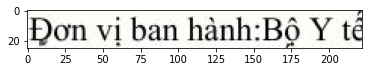

Đơn vị ban hành:Bộ Y tế


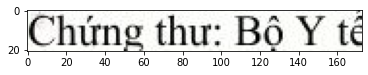

Chứng thư: Bộ Y tế


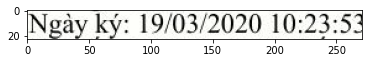

Ngày ký: 19/03/2020 10:23:53


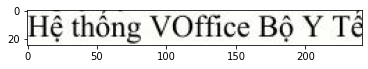

Hệ thống VOffice Bộ Y Tế


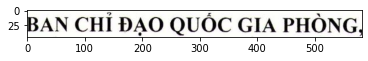

BAN CHÍ ĐẠO QUỐC GIA PHÒNG,


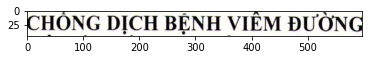

CHỐNG DỊCH BỆNH VIÊM ĐƯỜNG


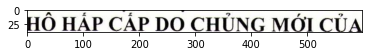

THÔ HÁP CẤP DO CHỦNG MỚI CỦA BỘ


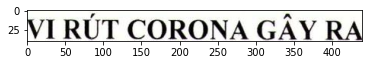

VI RỨT CORONA GÂY RA


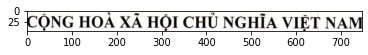

CỘNG HOÀ XÃ HỘI CHỦ NGHĨA VIỆT NAM


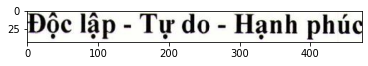

Độc lập - Tự do - Hạnh phúc


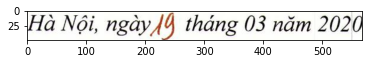

Hà Nội, ngày 19 tháng 03 năm 2020


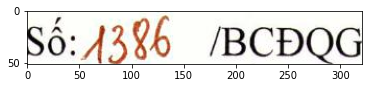

Số: 1386 BCĐQG


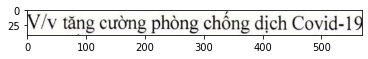

V/v tăng cường phòng chống dịch Covid-19


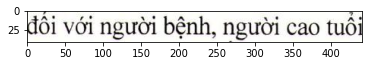

đối với người bệnh, người cao tuổi


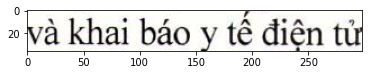

và khai báo y tế điện tử


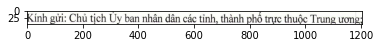

Kính gửi: Chủ tịch Ủy ban nhân dân các tỉnh, thành phố trực thuộc Trung ương;


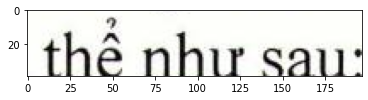

thể như sau:


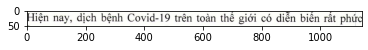

Hiện nay, dịch bệnh Covid-19 trên toàn thế giới có diễn biến rất phức


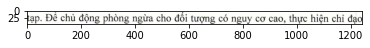

tạp. Để chủ động phòng ngừa cho đối tượng có nguy cơ cao, thực hiện chỉ đạo


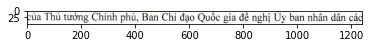

của Thủ tướng Chính phủ, Ban Chỉ đạo Quốc gia đề nghị Ủy ban nhân dân các


In [ ]:
for line in lines[20:40]:
    line = line.rstrip('\n')
    fname = line.split('\t')[0]
    content = line.split('\t')[1]
    try:
        img = cv2.imread(os.path.join(test_file_img,fname))
        img = Image.fromarray(np.uint8(img))
    except:
        continue
    s = pred_seq2seq.predict(img)
    plt.imshow(img)
    plt.show()
    print(s)

In [ ]:
num_test

1166

In [ ]:
# WER and CER functions

def WER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Word Error Rate between 2 strings
    """
    # Splits str to list of words 
    hypo = hypo.split()
    ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r

def CER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Character Error Rate between 2 strings
    """
    # No need to split strings to list of words.
    # hypo = hypo.split()
    # ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r